In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv')

In [3]:
print("The drug review dataset has",data.shape[0],"records and",data.shape[1],"features")

The drug review dataset has 161297 records and 7 features


In [4]:
data=data.head(1000)
data.shape

(1000, 7)

In [5]:
data.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


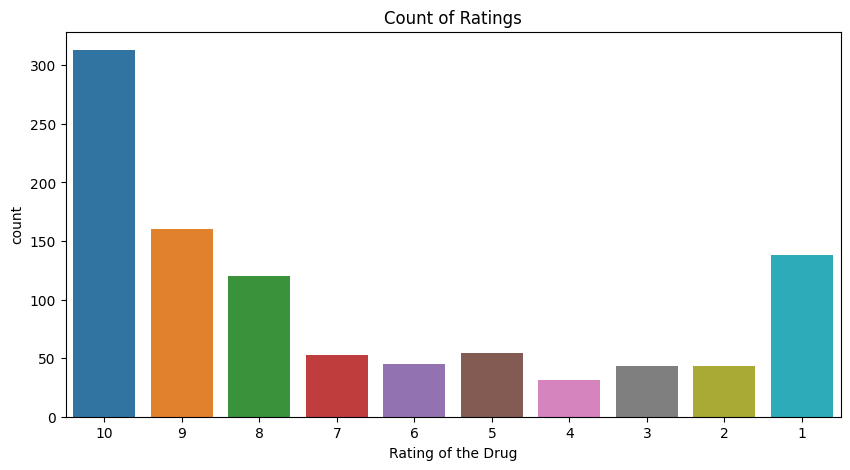

In [6]:
rating_counts = data['rating'].value_counts()
sorted_ratings = rating_counts.sort_index(ascending=False)
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', data=data, order=sorted_ratings.index)
plt.xlabel('Rating of the Drug')
plt.title('Count of Ratings')
plt.show()

In [7]:
data['review'].values[0]

'"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"'

In [8]:
sample=data['review'][50]
print(sample)

"Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."


In [9]:
tokens=nltk.word_tokenize(sample)
tokens[:20]

['``',
 'Hey',
 'Guys',
 ',',
 'It',
 '&',
 '#',
 '039',
 ';',
 's',
 'been',
 '4',
 'months',
 'since',
 'my',
 'last',
 'post',
 'as',
 'I',
 'wanted']

In [10]:
tags=nltk.pos_tag(tokens)
tags[:20]

[('``', '``'),
 ('Hey', 'NNP'),
 ('Guys', 'NNP'),
 (',', ','),
 ('It', 'PRP'),
 ('&', 'CC'),
 ('#', '#'),
 ('039', 'CD'),
 (';', ':'),
 ('s', 'VBD'),
 ('been', 'VBN'),
 ('4', 'CD'),
 ('months', 'NNS'),
 ('since', 'IN'),
 ('my', 'PRP$'),
 ('last', 'JJ'),
 ('post', 'NN'),
 ('as', 'IN'),
 ('I', 'PRP'),
 ('wanted', 'VBD')]

In [11]:
entities=nltk.chunk.ne_chunk(tags[:20])
# entities.pprint()
print(entities)

(S
  ``/``
  Hey/NNP
  Guys/NNP
  ,/,
  It/PRP
  &/CC
  #/#
  039/CD
  ;/:
  s/VBD
  been/VBN
  4/CD
  months/NNS
  since/IN
  my/PRP$
  last/JJ
  post/NN
  as/IN
  I/PRP
  wanted/VBD)


# **VALENCE AWARE DICTIONARY AND sENTIMENT REASONER (VADER)**

In [12]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [13]:
sia=SentimentIntensityAnalyzer()
sia.polarity_scores('Today is a nice day')

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.4215}

In [14]:
sia.polarity_scores('I am going to fail my exams!')

{'neg': 0.431, 'neu': 0.569, 'pos': 0.0, 'compound': -0.5848}

In [15]:
sia.polarity_scores(sample)

{'neg': 0.035, 'neu': 0.905, 'pos': 0.06, 'compound': 0.6597}

In [16]:
result={}
for i, row in tqdm(data.iterrows(), total=len(data)):
    review=row['review']
    ID=row['uniqueID']
    result[ID]=sia.polarity_scores(review)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
# result
# Displaying only the first 20 items oof the dictionary
for key, value in list(result.items())[:20]:
    print(f"{key}: {value}")


206461: {'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.296}
95260: {'neg': 0.018, 'neu': 0.892, 'pos': 0.09, 'compound': 0.8603}
92703: {'neg': 0.038, 'neu': 0.884, 'pos': 0.078, 'compound': 0.7645}
138000: {'neg': 0.027, 'neu': 0.879, 'pos': 0.093, 'compound': 0.7184}
35696: {'neg': 0.064, 'neu': 0.758, 'pos': 0.178, 'compound': 0.9403}
155963: {'neg': 0.143, 'neu': 0.747, 'pos': 0.11, 'compound': 0.5883}
165907: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
102654: {'neg': 0.174, 'neu': 0.756, 'pos': 0.069, 'compound': -0.9468}
74811: {'neg': 0.207, 'neu': 0.677, 'pos': 0.116, 'compound': -0.5593}
48928: {'neg': 0.202, 'neu': 0.642, 'pos': 0.156, 'compound': -0.901}
29607: {'neg': 0.131, 'neu': 0.732, 'pos': 0.137, 'compound': 0.2479}
75612: {'neg': 0.221, 'neu': 0.567, 'pos': 0.212, 'compound': 0.0147}
191290: {'neg': 0.149, 'neu': 0.851, 'pos': 0.0, 'compound': -0.8591}
221320: {'neg': 0.091, 'neu': 0.81, 'pos': 0.099, 'compound': -0.0342}
98494: {'neg': 0.081, 'ne

In [18]:
vader=pd.DataFrame(result).T
vader.reset_index(inplace=True)
vader = vader.rename(columns={'index': 'uniqueID'})
vader=vader.merge(data,on='uniqueID',how='left')

In [19]:
vader

,uniqueID,neg,neu,pos,compound,drugName,condition,review,rating,date,usefulCount
0,206461,0.136,0.864,0.000,-0.2960,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,0.018,0.892,0.090,0.8603,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,0.038,0.884,0.078,0.7645,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,0.027,0.879,0.093,0.7184,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,0.064,0.758,0.178,0.9403,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
...,...,...,...,...,...,...,...,...,...,...,...
995,206872,0.000,0.851,0.149,0.7857,Duac,Acne,"""The product is working so well for my athleti...",8,10-Oct-09,9
996,214615,0.073,0.795,0.132,0.2023,Liothyronine,Underactive Thyroid,"""as a supplement to levothyroxine it has been ...",10,4-Jun-15,66
997,221357,0.141,0.813,0.046,-0.8637,Dextromethorphan,Cough,"""This worked great for my husband until he gav...",1,2-May-16,6
998,135157,0.049,0.862,0.089,0.4610,Dapsone,Acne,"""I have tried almost everything under the sun ...",10,2-Apr-10,39


In [20]:
vader.describe()

,uniqueID,neg,neu,pos,compound,rating,usefulCount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,115431.611000,0.115904,0.784390,0.099698,-0.065212,6.918000,27.403000
std,67596.636901,0.085756,0.101539,0.077379,0.670478,3.294257,34.464596
min,226.000000,0.000000,0.202000,0.000000,-0.991100,1.000000,0.000000
25%,55318.750000,0.058750,0.732000,0.050000,-0.719175,4.000000,6.000000
50%,117749.000000,0.104000,0.786000,0.093000,-0.151100,8.000000,15.000000
75%,174094.250000,0.160000,0.848000,0.136000,0.606100,10.000000,36.000000
max,232277.000000,0.798000,1.000000,0.628000,0.982800,10.000000,376.000000


Text(0.5, 1.0, 'Compound score for Drug review')

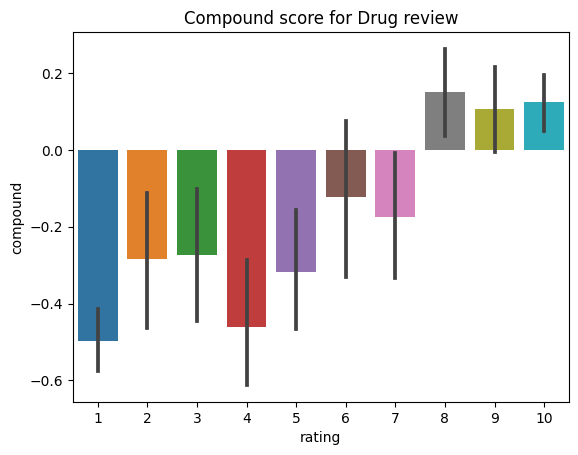

In [21]:
sns.barplot(data=vader,x='rating',y='compound')
plt.title('Compound score for Drug review')

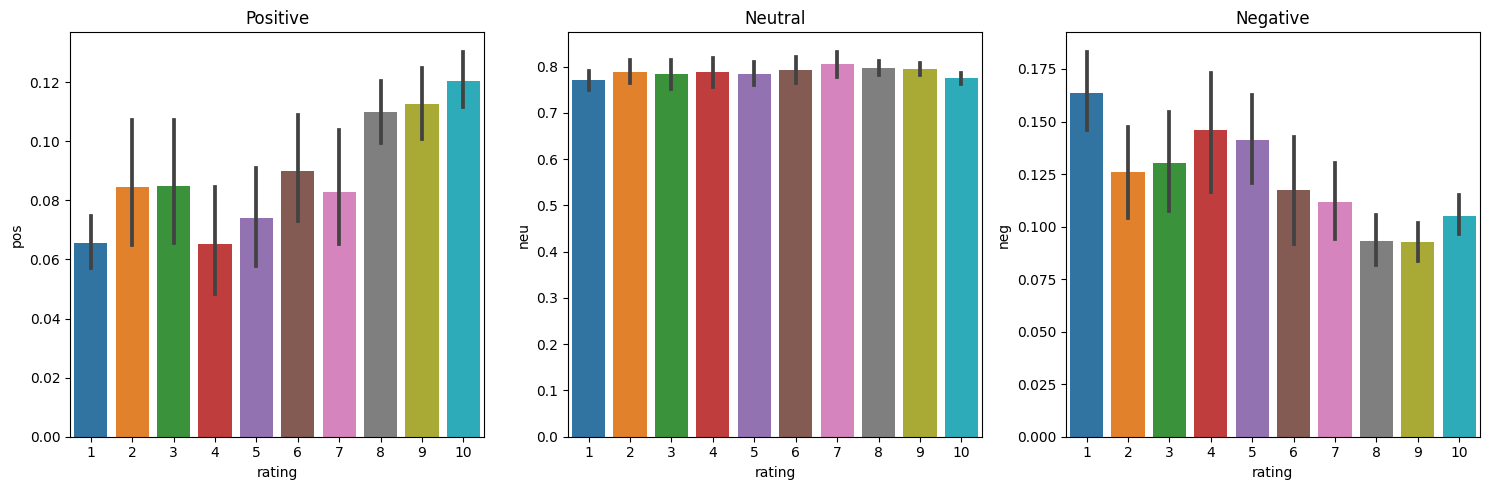

In [22]:
fig, axs =plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vader,x='rating',y='pos',ax=axs[0])
sns.barplot(data=vader,x='rating',y='neu',ax=axs[1])
sns.barplot(data=vader,x='rating',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show() 

# **ROBERTA MODEL**

In [23]:
#DEEP LEARNING MODEL-PRE TRAINED
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
#Vader results on example 
print(sample)
sia.polarity_scores(sample)

"Hey Guys,  It&#039;s been 4 months since my last post as I wanted to give it a few months to see how this was going to work.  So, I have been on Trulicity for six months now with Metformin.  When I hit the five month period the diarrhea, gas, sulphur belching finally subsided.  I now longer have any of those side effects.  However, I still haven&#039;t lost any weight at all, but I think that was because when I first started Trulicity I was taking it with Glimepiride and that one has a side effect of weight gain so I think the two meds were fighting each other lol.  I have been back on the Metformin with Trulicity for about a week now, so we will see what this does.  I was diagnosed as  stage 3 chronic kidney disease (CKD 3) so I am watching diet closely."


{'neg': 0.035, 'neu': 0.905, 'pos': 0.06, 'compound': 0.6597}

In [26]:
encoded=tokenizer(sample, return_tensors='pt')
output=model(**encoded)
score=output[0][0].detach().numpy()
score=softmax(score)
score_dict={
    'r_neg': score[0],
    'r_neu': score[1],
    'r_pos': score[2]
}

In [27]:
print(score_dict)

{'r_neg': 0.3461283, 'r_neu': 0.5328169, 'r_pos': 0.12105482}


In [28]:
def roberta_scores(sample):
    encoded=tokenizer(sample, return_tensors='pt')
    output=model(**encoded)
    score=output[0][0].detach().numpy()
    score=softmax(score)
    score_dict={
        'r_neg': score[0],
        'r_neu': score[1],
        'r_pos': score[2]
    }
    return score_dict

In [29]:
result={}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        review=row['review']
        ID=row['uniqueID']
        vader_result=sia.polarity_scores(review)
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value

        roberta_result=roberta_scores(review)
        both={**vader_result_rename, **roberta_result}
        result[ID]=both
    except RuntimeError:
        print(f'Broke for id {ID}')

  0%|          | 0/1000 [00:00<?, ?it/s]

Broke for id 102449


In [30]:
roberta=pd.DataFrame(result).T
roberta.reset_index(inplace=True)
roberta = roberta.rename(columns={'index': 'uniqueID'})
roberta=roberta.merge(data,on='uniqueID',how='left')

In [31]:
roberta.head()

,uniqueID,vader_neg,vader_neu,vader_pos,vader_compound,r_neg,r_neu,r_pos,drugName,condition,review,rating,date,usefulCount
0,206461,0.136,0.864,0.000,-0.2960,0.037039,0.757927,0.205035,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,0.018,0.892,0.090,0.8603,0.010841,0.068288,0.920871,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,0.038,0.884,0.078,0.7645,0.550204,0.336779,0.113017,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,0.027,0.879,0.093,0.7184,0.060381,0.279349,0.660271,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,0.064,0.758,0.178,0.9403,0.039145,0.132863,0.827992,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [32]:
roberta.columns

Index(['uniqueID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'r_neg', 'r_neu', 'r_pos', 'drugName', 'condition', 'review', 'rating',
       'date', 'usefulCount'],
      dtype='object')

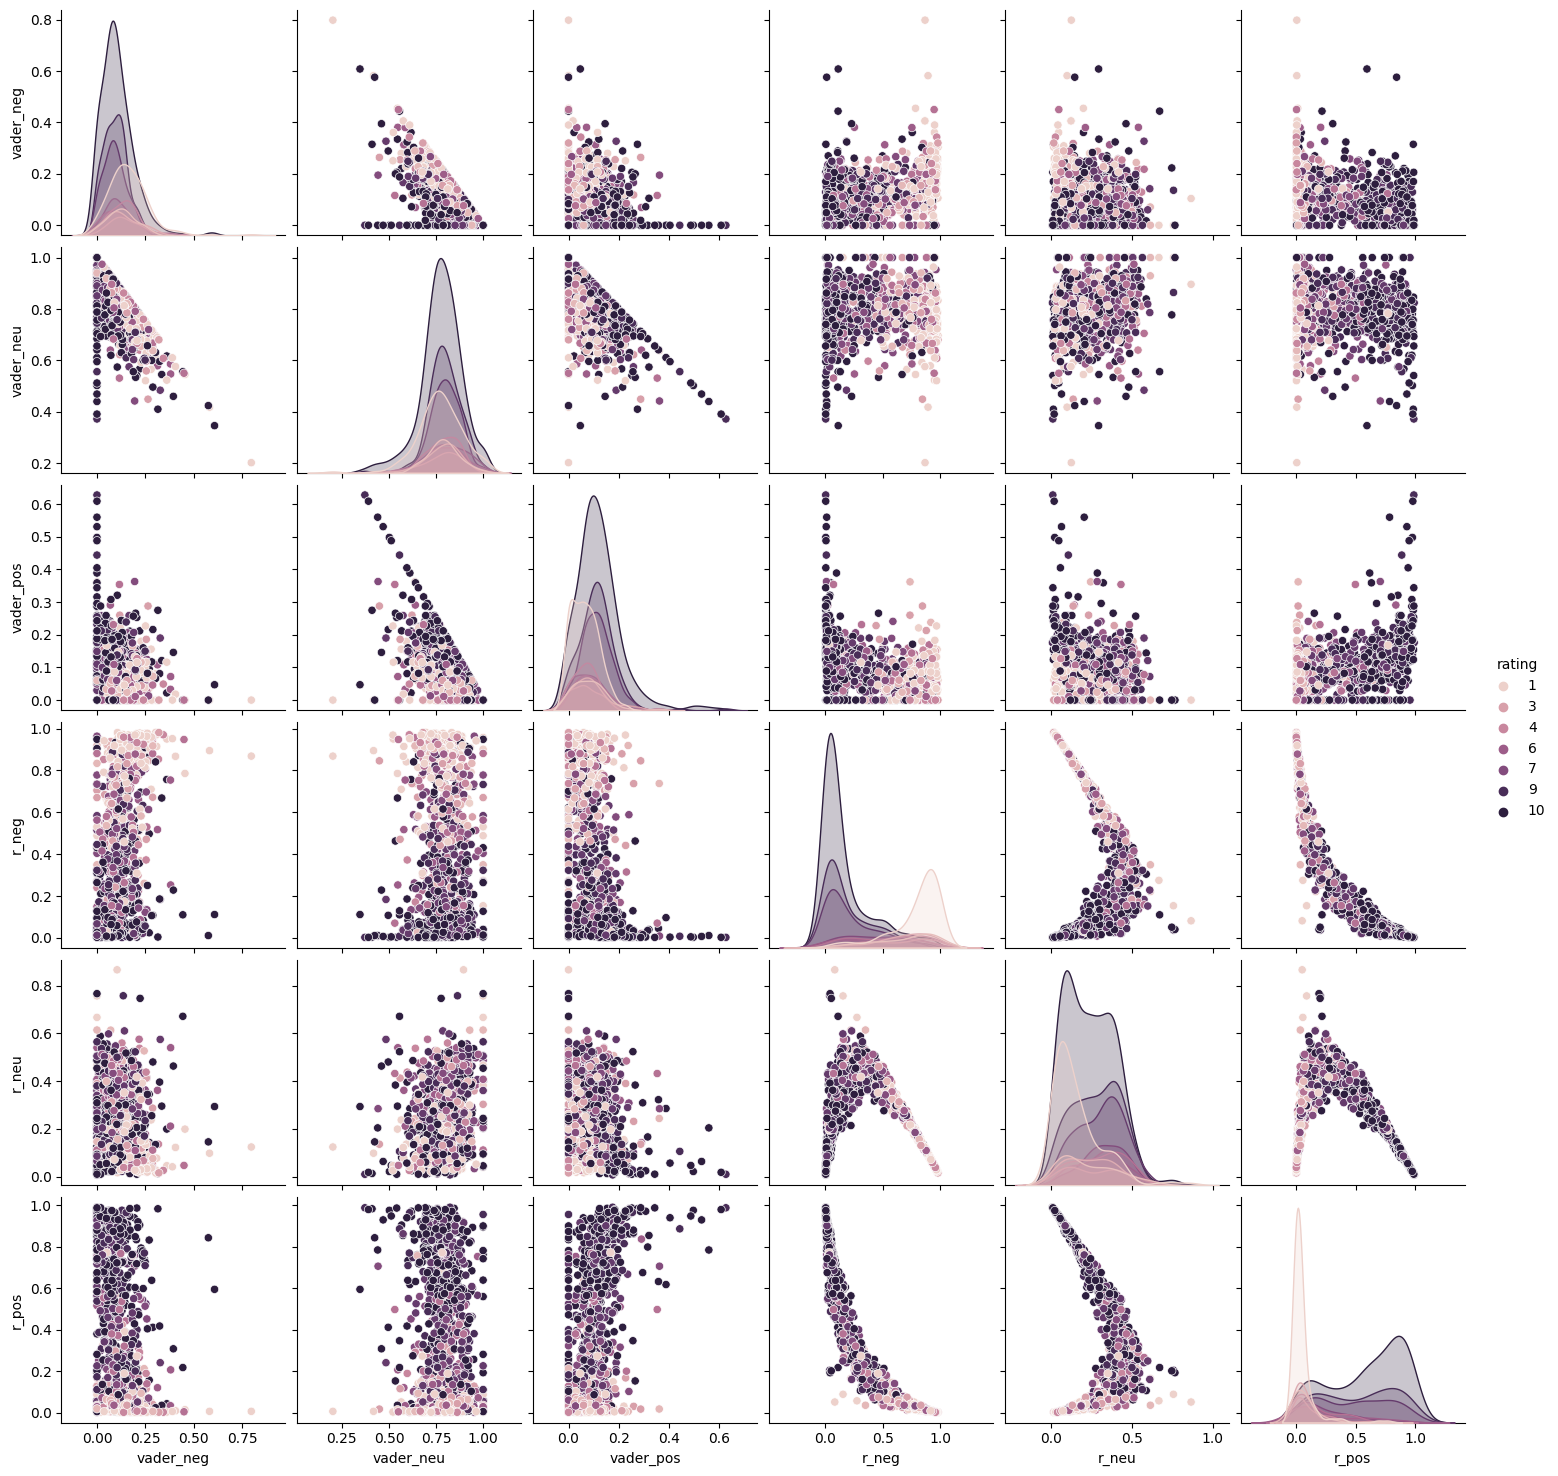

In [33]:
sns.pairplot(data=roberta,
            vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'r_neg', 'r_neu', 'r_pos'],
            hue='rating')
plt.show()

# **PIPELINES**

In [34]:
from transformers import pipeline
pipeline_sentiment = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [35]:
pipeline_sentiment('Learning NLP no big deal')

[{'label': 'NEGATIVE', 'score': 0.9956313371658325}]